In [1]:
import numpy as np
import matplotlib.pyplot as plt
import datascience
%matplotlib inline
import statsmodels.api as sm

### Regression is just (from wikipedia):

### In statistics, linear regression is a linear approach to modeling the relationship between a scalar response (or dependent variable) and one or more explanatory variables (or independent variables). The case of one explanatory variable is called simple linear regression. 

### y = a + B*x

### This is just a line - We are regressing y on x
### a is the intercept, and B is the slope

### We have y and x, and regression is how we estimate the intercept and slope

### Lets simulate some data and do regression

In [2]:
x = np.random.rand(100)

In [3]:
x

array([0.72039711, 0.58947194, 0.03256628, 0.94550342, 0.97212903,
       0.30431972, 0.8939585 , 0.86304755, 0.72220653, 0.59931308,
       0.52528955, 0.36466712, 0.54219135, 0.20413172, 0.2881066 ,
       0.72573133, 0.36883048, 0.12005236, 0.91327662, 0.24270188,
       0.24365044, 0.08362697, 0.15911736, 0.16581054, 0.83410125,
       0.73807544, 0.198975  , 0.37169525, 0.57841524, 0.34066629,
       0.53309884, 0.05533501, 0.39032982, 0.26149362, 0.00824023,
       0.87061477, 0.34273922, 0.71286597, 0.989819  , 0.03959144,
       0.2172743 , 0.33655931, 0.99271865, 0.90530784, 0.04196855,
       0.45698979, 0.7271534 , 0.50663086, 0.26508858, 0.41000213,
       0.14942747, 0.43813752, 0.11560975, 0.81690094, 0.47925048,
       0.66548993, 0.28593418, 0.15766609, 0.49828145, 0.88887017,
       0.85314139, 0.31173156, 0.38875729, 0.67432864, 0.74530519,
       0.22995046, 0.46808349, 0.72149271, 0.63704447, 0.55169677,
       0.06774898, 0.93508278, 0.09474498, 0.63677387, 0.68793

In [4]:
epsilon = .5*np.random.rand(100)

In [5]:
y = 2*x + epsilon

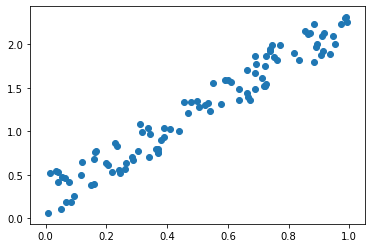

In [6]:
plt.scatter(x,y)

In [7]:
X = sm.add_constant(x)
mod = sm.OLS(y, X)
res = mod.fit()

In [8]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     1581.
Date:                Tue, 05 Nov 2019   Prob (F-statistic):           2.86e-62
Time:                        15:34:42   Log-Likelihood:                 47.846
No. Observations:                 100   AIC:                            -91.69
Df Residuals:                      98   BIC:                            -86.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2255      0.030      7.533      0.000       0.166       0.285
x1             2.0352      0.051     39.766      0.000       1.934       2.137
==============================================================================
Omnibus:                       64.801   Durbin-Watson:                   1.778
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                7.425
Skew:                           0.053   Prob(JB):                       0.0244
Kurtosis:                       1.669   Cond. No.                         4.30
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
intercept = res.params[0]
slope = res.params[1]
res.params

array([0.22550129, 2.03517488])

In [10]:
predictions  = intercept + slope*x

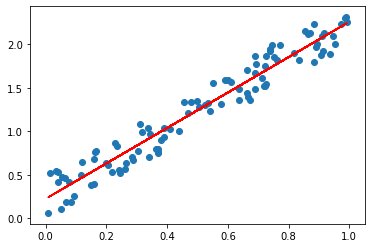

In [11]:
plt.scatter(x,y)
plt.plot(x,predictions, color ='r')

### Now lets reverse it!

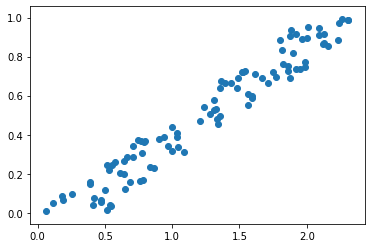

In [12]:
plt.scatter(y,x)

In [13]:
Y = sm.add_constant(y)
mod_y = sm.OLS(x, Y)
res_y = mod_y.fit()

In [14]:
res_y.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     1581.
Date:                Tue, 05 Nov 2019   Prob (F-statistic):           2.86e-62
Time:                        15:38:20   Log-Likelihood:                 121.91
No. Observations:                 100   AIC:                            -239.8
Df Residuals:                      98   BIC:                            -234.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0749      0.016     -4.605      0.000      -0.107      -0.043
x1             0.4627      0.012     39.766      0.000       0.440       0.486
==============================================================================
Omnibus:                       18.673   Durbin-Watson:                   1.919
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                5.098
Skew:                          -0.154   Prob(JB):                       0.0781
Kurtosis:                       1.938   Cond. No.                         4.54
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
intercept_y = res_y.params[0]
slope_y = res_y.params[1]
res_y.params

array([-0.07489315,  0.46268481])

In [16]:
predictions_y = intercept_y + slope_y*y

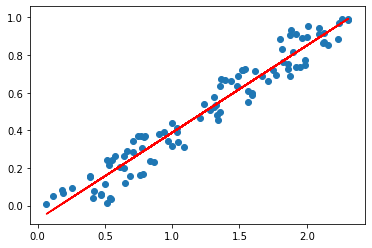

In [17]:
plt.scatter(y,x)
plt.plot(y,predictions_y, color ='r')


### So  what is going on?

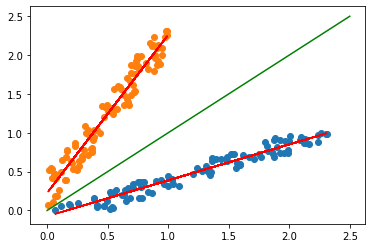

In [18]:
line = np.linspace(0,2.5, 100)

plt.scatter(y,x)
plt.scatter(x,y)
plt.plot(y,predictions_y, color ='r')
plt.plot(x,predictions, color ='r')
plt.plot(line,line, color = 'green')

### What are residuals? Just what we missed - what we failed to predict

### The truth (actual y), versus what we predicted for y_pred ($\hat{y}$)
### residuals are just $\sum_i y_i - \hat{y}_i$

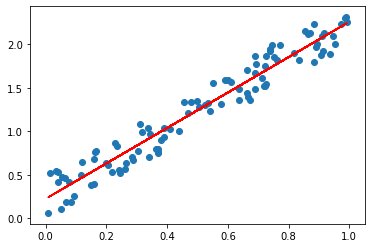

In [19]:
plt.scatter(x,y)
plt.plot(x,predictions, color ='r')

In [20]:
residuals = (predictions - y).round(2)
residuals

array([ 0.17, -0.17, -0.25,  0.06, -0.04,  0.07,  0.04, -0.14, -0.05,
       -0.15, -0.01,  0.17,  0.09,  0.03,  0.15, -0.16,  0.17, -0.18,
        0.16,  0.17,  0.2 ,  0.21,  0.16, -0.22,  0.11, -0.2 , -0.01,
        0.23,  0.09,  0.21, -0.01, -0.13, -0.02,  0.19,  0.18, -0.13,
       -0.04,  0.06, -0.07, -0.23,  0.14, -0.13, -0.01,  0.19, -0.1 ,
       -0.19,  0.16, -0.02,  0.12,  0.03,  0.14,  0.12, -0.04, -0.01,
       -0.13,  0.18,  0.1 , -0.14, -0.11,  0.07, -0.2 , -0.23,  0.08,
        0.24, -0.25, -0.17, -0.03,  0.17,  0.04, -0.21,  0.17,  0.24,
        0.16,  0.16, -0.04, -0.1 , -0.13, -0.01,  0.14,  0.23, -0.24,
       -0.22,  0.1 , -0.04, -0.19, -0.21, -0.05, -0.1 , -0.27, -0.13,
       -0.13, -0.11,  0.16, -0.04,  0.21,  0.14,  0.22, -0.21, -0.07,
       -0.13])

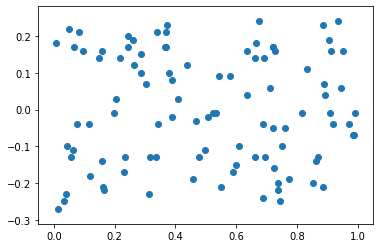

In [21]:
plt.scatter(x, residuals)

### Root Mean Squar Error (RSME) - is just a formula

### RMSE =  $\sqrt{\frac{1}{n} \sum_i (y_i - \hat{y}_i)^2}$

### Lets calculate it 

In [22]:
step_1 = (predictions - y)**2
step_2 = step_1.sum()/y.size
final_step = np.sqrt(step_2)
final_step

0.14995874321305774

# Bayes Rule

## A woman is pregnant with twins - what is the probability the are identical?

## Some notation

## Probability this woman has identical twins is P(I)

## We know that one third of twins are identical, that is P(I) = 1/3

## Now she learns that her twins are the same gender

## What is the probability her twins are identical given that they are the same gender?

## Specifically, what is P(I|SG) where SG is same gender?

## Applying Bayes rule gives us:

## P(I|SG) = P(SG|I)*P(I)/P(SG)

## We know P(I) = 1/3
## What is P(SG|I)? What is the probability the identical twins share the same gender?

## This we should know...

## What is P(SG), meaning, what is the probability two twins share the same gender?



## Well, there are only two ways to have twins - fraternal or identical

## So P(SG) (the chances any given twins are the same gender) is just:
 
## P(I) * P(SG|I) + P(F) * (P(SG|F)

## We know P(I), P(SG|I) and P(F) (its just 1 - P(I))

## What is P(SG|F)?

## Well there are four equally likely possibilities:

## BB, BG, GB, GG

## So P(SG|F) = 1/2

## Therefore P(SG)  = P(I) * P(SG|I) + P(F) * P(SG|F) = 1/3 * 1 + 2/3 * 1/2 = 2/3

## Now we are ready to apply bayes rule

## P(I|SG) = P(SG|I)*P(I)/P(SG) = (1 * 1/3) / 2/3 = 1/2

## Given that her twins share the same gender, she has a 50% change of having identical twins
